In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sc
import statsmodels.api as sm
import os

In [67]:
df = pd.read_csv('delivery_time.csv')
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [69]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


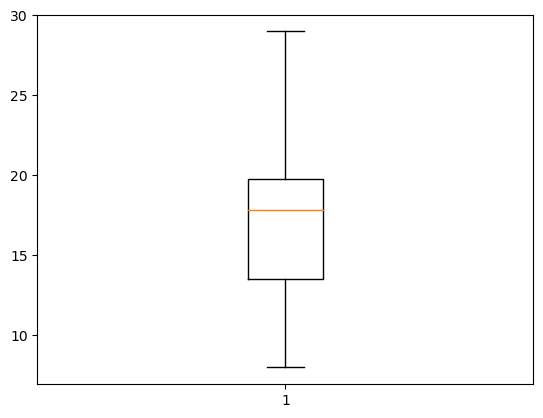

In [70]:
plt.boxplot(df['Delivery Time'])
plt.show()

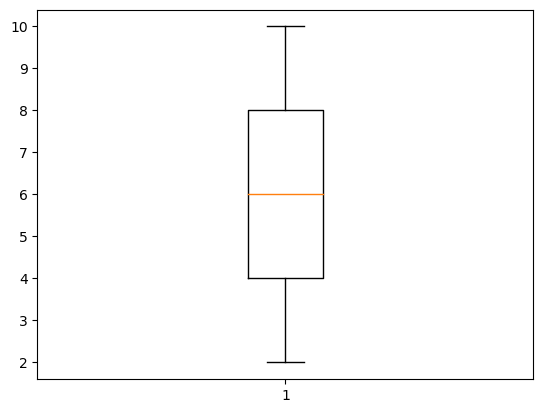

In [71]:
plt.boxplot(df['Sorting Time'])
plt.show()

<AxesSubplot:>

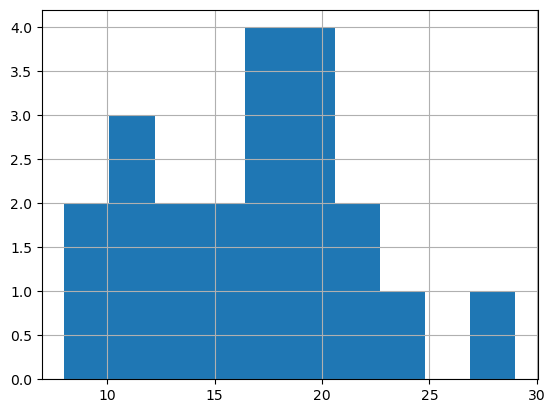

In [72]:
df['Delivery Time'].hist()

<AxesSubplot:>

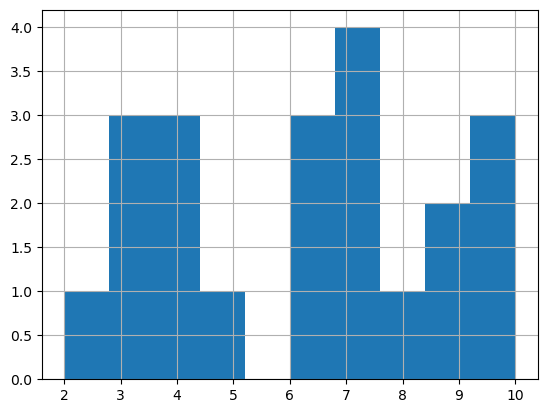

In [73]:
df['Sorting Time'].hist()

In [74]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


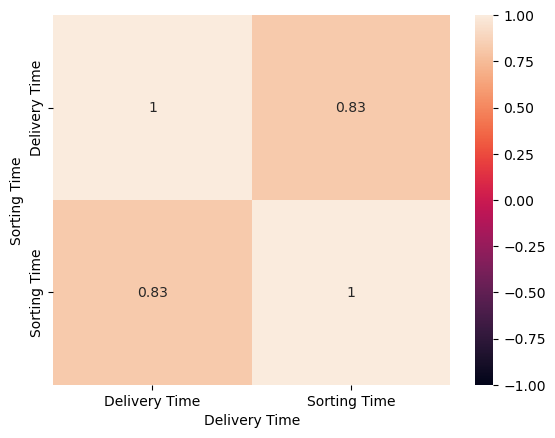

In [75]:
sns.heatmap(df.corr(),vmin = -1,vmax = 1 ,annot = True)
plt.xlabel('Delivery Time')
plt.ylabel('Sorting Time')
plt.show()

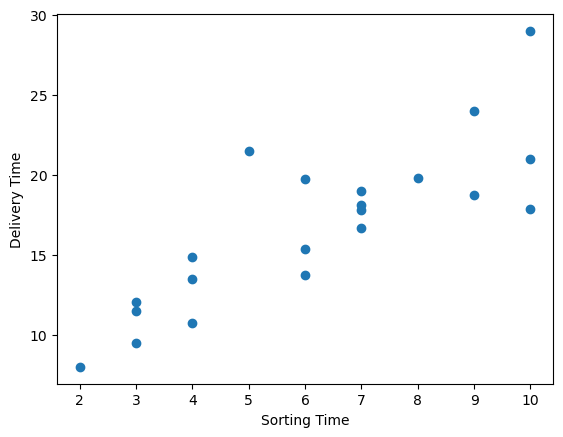

In [76]:
plt.scatter(x='Sorting Time' ,y = 'Delivery Time',data = df)
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

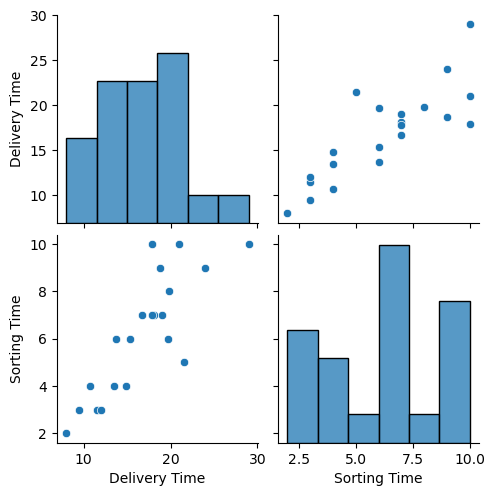

In [77]:
sns.pairplot( df)
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

In [78]:
from scipy.stats import pearsonr

In [79]:
corr,_= pearsonr(df['Delivery Time'],df['Sorting Time'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.826


In [80]:
x = df['Sorting Time']
y = df['Delivery Time']

In [81]:
# This adds the constant term beta0 to the Simple Linear Regression. If this is not done, statsmodel tries to create a model by keeping the intercept as 0
x = sm.add_constant(x)
x 

,const,Sorting Time
0,1.0,10
1,1.0,4
2,1.0,6
3,1.0,9
4,1.0,10
5,1.0,6
6,1.0,7
7,1.0,3
8,1.0,10
9,1.0,9


In [82]:
print(x.head())

print(y.head())

   const  Sorting Time
0    1.0            10
1    1.0             4
2    1.0             6
3    1.0             9
4    1.0            10
0    21.00
1    13.50
2    19.75
3    24.00
4    29.00
Name: Delivery Time, dtype: float64


In [83]:
model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 01 Aug 2023   Prob (F-statistic):           3.98e-06
Time:                        18:02:07   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.5827      1.722      3.823      0.001       2.979      10.186
Sorting Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
model.rsquared*100

68.2271474841723

In [85]:
6.5827 + 1.6490*10

23.0727

In [86]:
6.5827 + 1.6490*4

13.1787

In [87]:
6.5827 + 1.6490*5

14.8277

In [88]:
6.5827 + 1.6490*6

16.4767

In [89]:
ypred = model.predict(x)
print(ypred)

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64


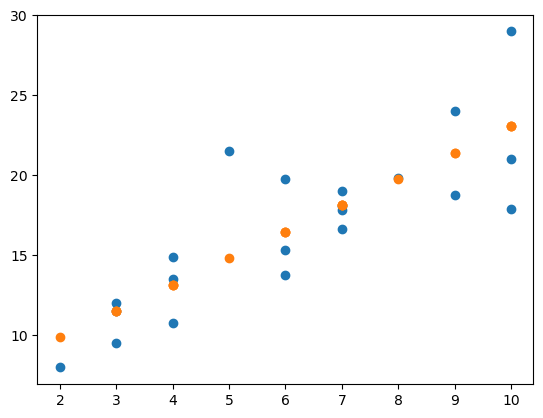

In [90]:
plt.scatter(df['Sorting Time'],df['Delivery Time'])
plt.scatter(df['Sorting Time'],ypred)

In [91]:
df['Prediction'] = ypred
df.head()

,Delivery Time,Sorting Time,Prediction
0,21.00,10,23.072933
1,13.50,4,13.178814
2,19.75,6,16.476853
3,24.00,9,21.423913
4,29.00,10,23.072933


In [92]:
# Import the necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your dataset and split it into training and testing sets
# X is the feature matrix, y is the target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_test, y_train, y_test
# Create an instance of the Logistic Regression model
#model = LogisticRegression()

# Fit the model to the training data
#model.fit(x_train, y_train)

# Make predictions on the testing data
#y_pred = model.predict(x_test)

# Evaluate the accuracy of the model
#accuracy = accuracy_score(y_test, y_pred)
#print("Accuracy:", accuracy)


(    const  Sorting Time
 5     1.0             6
 11    1.0             4
 3     1.0             9
 18    1.0             2
 16    1.0             6
 13    1.0             3
 2     1.0             6
 9     1.0             9
 20    1.0             5
 4     1.0            10
 12    1.0             7
 7     1.0             3
 10    1.0             8
 14    1.0             3
 19    1.0             7
 6     1.0             7,
     const  Sorting Time
 0     1.0            10
 17    1.0             7
 15    1.0             4
 1     1.0             4
 8     1.0            10,
 5     15.35
 11    10.75
 3     24.00
 18     8.00
 16    13.75
 13    11.50
 2     19.75
 9     18.75
 20    21.50
 4     29.00
 12    16.68
 7      9.50
 10    19.83
 14    12.03
 19    17.83
 6     19.00
 Name: Delivery Time, dtype: float64,
 0     21.00
 17    18.11
 15    14.88
 1     13.50
 8     17.90
 Name: Delivery Time, dtype: float64)

transformation Model

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [94]:
y_log = np.log(y_train)
lr_log = LinearRegression()
lr_log.fit(x_train,y_log)
y_log_pred = lr_log.predict(x_test)
y_log_pred

array([3.28376247, 2.89615425, 2.50854604, 2.50854604, 3.28376247])

In [95]:
from sklearn.metrics import r2_score,mean_squared_error,mean_squared_log_error
print(r2_score(y_test,y_log_pred))
print(np.sqrt(mean_squared_error(y_test,y_log_pred)))
print(mean_squared_log_error(y_test,y_log_pred))

-28.716398036853377
14.372372855452358
2.3404621835174484


In [96]:
y_sqrt = np.sqrt(y_train)
lr_sqrt = LinearRegression()
lr_sqrt.fit(x_train,y_sqrt)
y_sqrt_pred = lr_sqrt.predict(x_test)
y_sqrt_pred
print(r2_score(y_test,y_sqrt_pred))
print(np.sqrt(mean_squared_error(y_test,y_sqrt_pred)))
print(mean_squared_log_error(y_test,y_sqrt_pred))

-23.098449692785405
12.942701768938546
1.5037173575216887


In [97]:
y_inv = 1/y_train
lr_inv = LinearRegression()
lr_inv.fit(x_train,y_inv)
y_inv_pred = lr_inv.predict(x_test)
y_inv_pred
print(r2_score(y_test,y_inv_pred))
print(np.sqrt(mean_squared_error(y_test,y_inv_pred)))
print(mean_squared_log_error(y_test,y_inv_pred))

-41.690877229349724
17.226535021608132
8.02595183660279


In [98]:
sd = pd.read_csv('Salary_Data.csv')
sd

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [99]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [100]:
sd.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


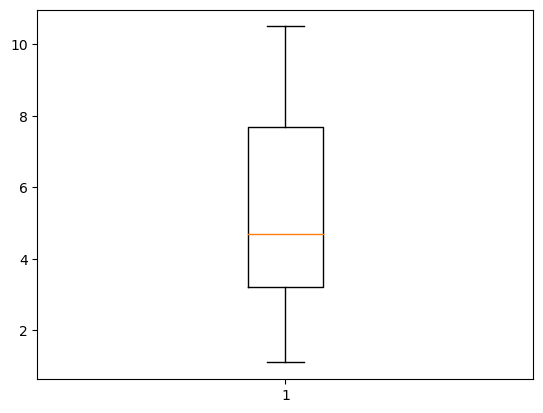

In [101]:
plt.boxplot(sd['YearsExperience'])
plt.show()

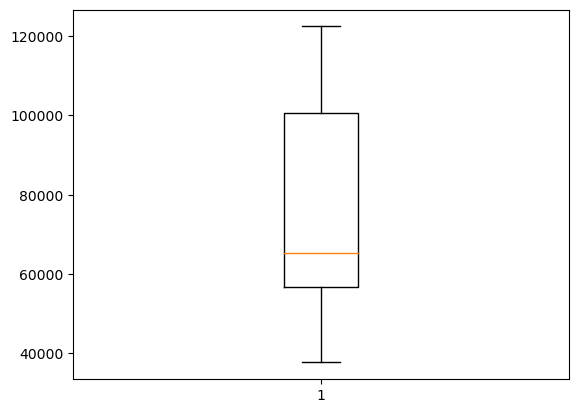

In [102]:
plt.boxplot(sd['Salary'])
plt.show()

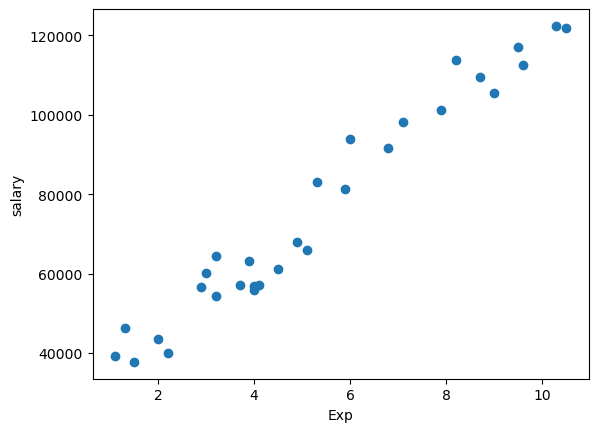

In [103]:
plt.scatter(sd['YearsExperience'],sd['Salary'])
plt.xlabel('Exp')
plt.ylabel('salary')
plt.show()

In [104]:
sd.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


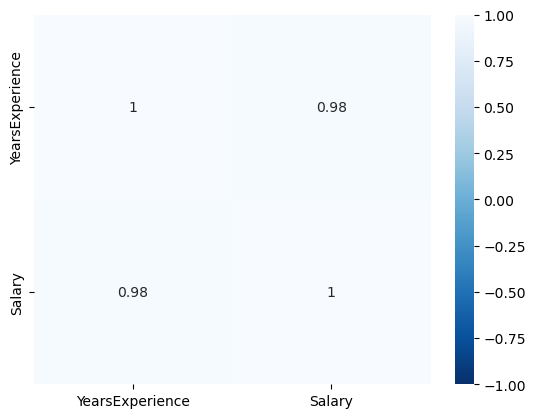

In [105]:
sns.heatmap(sd.corr(),vmin = -1,vmax =1 ,annot = True,cmap = 'Blues_r')
plt.show()

In [106]:
x = sd['YearsExperience']
y = sd['Salary']

In [107]:
x = sm.add_constant(x)
x

,const,YearsExperience
0,1.0,1.1
1,1.0,1.3
2,1.0,1.5
3,1.0,2.0
4,1.0,2.2
5,1.0,2.9
6,1.0,3.0
7,1.0,3.2
8,1.0,3.2
9,1.0,3.7


In [108]:
print(x.head())
print(y.head())

   const  YearsExperience
0    1.0              1.1
1    1.0              1.3
2    1.0              1.5
3    1.0              2.0
4    1.0              2.2
0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64


In [109]:
model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 01 Aug 2023   Prob (F-statistic):           1.14e-20
Time:                        18:02:09   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
model.rsquared*100

95.69566641435085

# predict Salary = 2.579e+04 + 9449.9623*YearsExperience

In [111]:
2.579e+04 + 9449.9623*1

35239.9623

In [112]:
model.predict(x)
ypred = model.predict(x)
print(ypred)

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64


In [113]:
sd['Predict Salary'] = round(ypred,2)
sd['Predict Salary']

0      36187.16
1      38077.15
2      39967.14
3      44692.12
4      46582.12
5      53197.09
6      54142.09
7      56032.08
8      56032.08
9      60757.06
10     62647.05
11     63592.05
12     63592.05
13     64537.05
14     68317.03
15     72097.02
16     73987.01
17     75877.00
18     81546.98
19     82491.97
20     90051.94
21     92886.93
22    100446.90
23    103281.89
24    108006.87
25    110841.86
26    115566.84
27    116511.84
28    123126.81
29    125016.80
Name: Predict Salary, dtype: float64

In [114]:
sd

,YearsExperience,Salary,Predict Salary
0,1.1,39343.0,36187.16
1,1.3,46205.0,38077.15
2,1.5,37731.0,39967.14
3,2.0,43525.0,44692.12
4,2.2,39891.0,46582.12
5,2.9,56642.0,53197.09
6,3.0,60150.0,54142.09
7,3.2,54445.0,56032.08
8,3.2,64445.0,56032.08
9,3.7,57189.0,60757.06


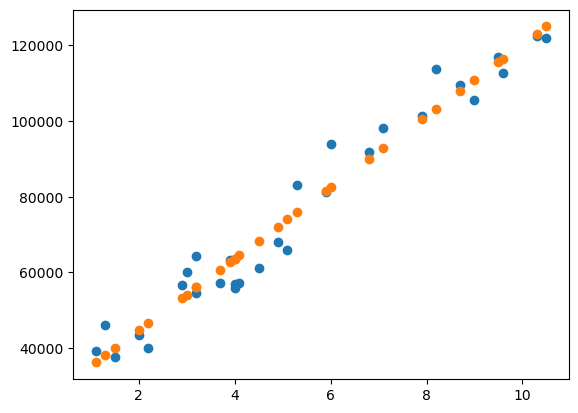

In [115]:
plt.scatter(sd['YearsExperience'],sd['Salary'])
plt.scatter(sd['YearsExperience'],sd['Predict Salary'])
plt.show()

In [116]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [117]:
y_log = np.log(y_train)
lr_log = LinearRegression()
lr_log.fit(x_train,y_log)
y_log_pred = lr_log.predict(x_test)
y_log_pred
print(r2_score(y_test,y_log_pred))
print(np.sqrt(mean_squared_error(y_test,y_log_pred)))
print(mean_squared_log_error(y_test,y_log_pred))

-13.543140028973271
86189.19267381466
77.3157147891621


In [118]:
y_sqrt = np.sqrt(y_train)
lr_sqrt = LinearRegression()
lr_sqrt.fit(x_train,y_sqrt)
y_sqrt_pred = lr_sqrt.predict(x_test)
y_sqrt_pred
print(r2_score(y_test,y_sqrt_pred))
print(np.sqrt(mean_squared_error(y_test,y_sqrt_pred)))
print(mean_squared_log_error(y_test,y_sqrt_pred))

-13.452888911146577
85921.34210354381
32.16354385772996


In [119]:
y_inv = 1/y_train
lr_inv = LinearRegression()
lr_inv.fit(x_train,y_inv)
y_inv_pred = lr_inv.predict(x_test)
y_inv_pred
print(r2_score(y_test,y_inv_pred))
print(np.sqrt(mean_squared_error(y_test,y_inv_pred)))
print(mean_squared_log_error(y_test,y_inv_pred))

-13.546820653096386
86200.098501312
127.59539112825185
